# Clustering Training Data

### Prepare csv file

In [ ]:
import pandas as pd

In [3]:
df = pd.read_excel('Persona.xlsx', sheet_name='Clustering')

In [4]:
df.head()

,CardNo,Food&Grocery,DepartmentStores,Travelservice,Transportation,Food&Grocery_F,DepartmentStores_F,Travelservice_F,Transportation_F
0,36,683018,77278,430122,461592,31,42,49,23
1,66,442893,107877,155591,462895,29,28,50,34
2,13,498225,305818,258809,158097,39,3,40,4
3,13,904833,355949,153383,69084,11,14,7,40
4,29,277480,54576,319086,14343,16,44,36,13


In [5]:
df.shape

(999, 9)

In [7]:
df.to_csv('persona_clustering.csv', index=False)

### read data from csv

In [42]:
import pandas as pd
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.externals import joblib

In [3]:
df = pd.read_csv('persona_clustering.csv', nrows=100)

In [4]:
df.shape

(100, 9)

In [5]:
df.head()

,CardNo,Food&Grocery,DepartmentStores,Travelservice,Transportation,Food&Grocery_F,DepartmentStores_F,Travelservice_F,Transportation_F
0,36,683018,77278,430122,461592,31,42,49,23
1,66,442893,107877,155591,462895,29,28,50,34
2,13,498225,305818,258809,158097,39,3,40,4
3,13,904833,355949,153383,69084,11,14,7,40
4,29,277480,54576,319086,14343,16,44,36,13


### check are there any null value

In [6]:
print(df.isna().sum())

CardNo                0
Food&Grocery          0
DepartmentStores      0
Travelservice         0
Transportation        0
Food&Grocery_F        0
DepartmentStores_F    0
Travelservice_F       0
Transportation_F      0
dtype: int64


### replace null value with 0

In [7]:
df.fillna(0, inplace=True)

### identify min max data

In [8]:
df.describe()

,CardNo,Food&Grocery,DepartmentStores,Travelservice,Transportation,Food&Grocery_F,DepartmentStores_F,Travelservice_F,Transportation_F
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,47.280000,524011.010000,240010.540000,267333.580000,249625.110000,30.070000,26.250000,25.310000,23.810000
std,26.948166,290432.299059,150577.062263,140338.921503,146156.354356,13.596089,14.826522,14.580806,14.732425
min,5.000000,13266.000000,2468.000000,1560.000000,3313.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,311328.500000,112596.250000,149111.500000,116158.250000,20.750000,14.750000,13.750000,10.750000
50%,44.500000,546050.500000,224499.500000,287673.500000,248023.000000,32.000000,25.000000,24.500000,23.000000
75%,68.250000,739952.000000,371668.000000,390412.250000,378552.000000,41.000000,39.250000,37.000000,35.250000
max,99.000000,997014.000000,499242.000000,478791.000000,490300.000000,50.000000,50.000000,50.000000,50.000000


### remove outlier using z-score

In [9]:
z = np.abs(stats.zscore(df))

In [10]:
z[:5]

array([[0.4206901 , 0.55024196, 1.08617046, 1.16581   , 1.4575811 ,
        0.06874662, 1.06763714, 1.63292387, 0.05525775],
       [0.69816655, 0.28070799, 0.88193515, 0.80024499, 1.46654112,
        0.07909557, 0.11862635, 1.70185269, 0.69515612],
       [1.2784802 , 0.08923221, 0.43923679, 0.06104882, 0.62938907,
        0.6601154 , 1.57603577, 1.01256444, 1.35142716],
       [1.2784802 , 1.31783036, 0.77383988, 0.81605759, 1.24148309,
        1.40967532, 0.83038444, 1.26208679, 1.10447278],
       [0.68175665, 0.85311788, 1.23769665, 0.37062519, 1.6179072 ,
        1.04006984, 1.20321011, 0.73684914, 0.73745217]])

In [11]:
z_upper_3 = np.where(z>3)

In [12]:
row_drop = z_upper_3[0]

In [13]:
len(row_drop)

0

In [14]:
len(set(row_drop))

0

In [15]:
df_no_outlier = df.drop(row_drop)

In [16]:
df_no_outlier.shape

(100, 9)

In [17]:
df_no_outlier.head()

,CardNo,Food&Grocery,DepartmentStores,Travelservice,Transportation,Food&Grocery_F,DepartmentStores_F,Travelservice_F,Transportation_F
0,36,683018,77278,430122,461592,31,42,49,23
1,66,442893,107877,155591,462895,29,28,50,34
2,13,498225,305818,258809,158097,39,3,40,4
3,13,904833,355949,153383,69084,11,14,7,40
4,29,277480,54576,319086,14343,16,44,36,13


### Normalize the data (0-1)

In [18]:
df_scaled = MinMaxScaler().fit_transform(df_no_outlier)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
df_scaled[:5]

array([[0.32978723, 0.68081663, 0.15059162, 0.89801794, 0.94104976,
        0.62      , 0.84      , 0.98      , 0.46      ],
       [0.64893617, 0.43672465, 0.21218703, 0.32275984, 0.9437254 ,
        0.58      , 0.56      , 1.        , 0.68      ],
       [0.08510638, 0.49297076, 0.61063985, 0.53904503, 0.31784011,
        0.78      , 0.06      , 0.8       , 0.08      ],
       [0.08510638, 0.90629612, 0.71155294, 0.31813315, 0.13505699,
        0.22      , 0.28      , 0.14      , 0.8       ],
       [0.25531915, 0.26857895, 0.10489277, 0.66535074, 0.02264948,
        0.32      , 0.88      , 0.72      , 0.26      ]])

### optimal k number of cluster

In [20]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    sum_of_squared_distances.append(km.inertia_)

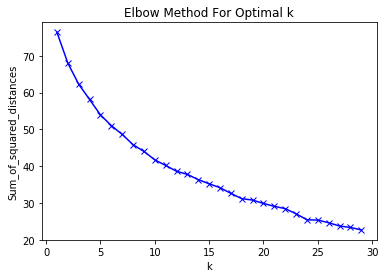

In [21]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### do kmeans, k=10

In [22]:
kmeans = KMeans(n_clusters=10, precompute_distances="auto", n_jobs=-1)
clusters = kmeans.fit_predict(df_scaled)

In [23]:
df_clusters = df_no_outlier

In [24]:
df_clusters['clusters'] = clusters

In [25]:
df_clusters.head()

,CardNo,Food&Grocery,DepartmentStores,Travelservice,Transportation,Food&Grocery_F,DepartmentStores_F,Travelservice_F,Transportation_F,clusters
0,36,683018,77278,430122,461592,31,42,49,23,5
1,66,442893,107877,155591,462895,29,28,50,34,3
2,13,498225,305818,258809,158097,39,3,40,4,7
3,13,904833,355949,153383,69084,11,14,7,40,7
4,29,277480,54576,319086,14343,16,44,36,13,6


### population for each centroid

In [26]:
unique_elements, counts_elements = np.unique(clusters, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 7 10 13 10  6 14 14 10 10  6]]


### centroid for all cluster

In [27]:
kmeans.cluster_centers_

array([[0.17021277, 0.47111949, 0.17427787, 0.38105865, 0.76189919,
        0.69142857, 0.24571429, 0.64571429, 0.75428571],
       [0.47340426, 0.76218422, 0.73155318, 0.84051832, 0.61062924,
        0.794     , 0.774     , 0.358     , 0.734     ],
       [0.49836334, 0.3946622 , 0.6901428 , 0.48402233, 0.26268558,
        0.50153846, 0.68615385, 0.69846154, 0.77230769],
       [0.53191489, 0.52694979, 0.47550818, 0.24719035, 0.84809677,
        0.484     , 0.628     , 0.75      , 0.254     ],
       [0.4822695 , 0.22956557, 0.47271965, 0.79301498, 0.91623698,
        0.64666667, 0.18333333, 0.35333333, 0.37333333],
       [0.37386018, 0.77493626, 0.30879147, 0.85518992, 0.44690794,
        0.41285714, 0.55714286, 0.68428571, 0.36857143],
       [0.30243161, 0.29695039, 0.40369162, 0.5354222 , 0.33565739,
        0.61428571, 0.75142857, 0.29714286, 0.22571429],
       [0.24680851, 0.61776542, 0.77185038, 0.31539611, 0.31395479,
        0.548     , 0.26      , 0.364     , 0.39      ],


### PCA for cluster

In [28]:
# reduce data dimension with PCA for visualization
reduced = PCA(n_components=2).fit_transform(df_clusters)

In [29]:
df_reduced = pd.DataFrame(reduced,columns=['pca1','pca2'])

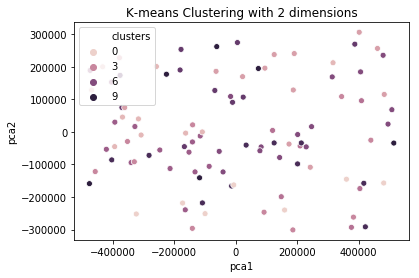

In [30]:
sns.scatterplot(x="pca1", y="pca2", hue=df_clusters['clusters'], data=df_reduced)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### eucledian distance

In [35]:
distance = kmeans.fit_transform(df_scaled)

In [36]:
distance[:5]

array([[1.03738294, 1.04317192, 1.12474096, 0.78019338, 0.96954269,
        1.28267066, 0.78082545, 1.08178349, 1.09235923, 1.25783495],
       [0.86565027, 0.95358629, 1.04919729, 0.38119913, 1.21699767,
        1.09623828, 0.98445457, 0.97424911, 0.86157261, 1.22303106],
       [0.82793927, 0.98545859, 1.12099385, 1.18894321, 1.04455453,
        0.64606581, 0.95633013, 1.17135872, 1.00348876, 1.23689784],
       [1.3812667 , 1.22312238, 0.81988729, 1.29894544, 1.02320082,
        0.91037576, 1.18284231, 1.40174487, 1.03819006, 1.28996651],
       [1.17642237, 0.98397946, 0.92791391, 1.0558575 , 1.10209112,
        1.06986262, 0.72438168, 1.54314775, 1.26952999, 1.05828879]])

### save model for testing

In [44]:
joblib.dump(kmeans, 'model_cluster.pkl')

['model_cluster.pkl']